##  Import Package yang diperlukan

In [1]:
import pandas as pd
import numpy as np

# import package visualisasi
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt

#import wordclouds
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


#import maps
import folium
from folium import plugins

-Importing Csv data london_crime

In [2]:
df_crime = pd.read_csv('london_crime_by_lsoa.csv')
print(df_crime.shape)
print(df_crime.isnull().sum())

(13490604, 7)
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


## Membuat deep copy

In [3]:
df_crime_copy = df_crime.copy()

# Cek Tipe data

In [4]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Cek Columns

In [5]:
df_crime.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

# Query data london crime borough Westminster tahun 2010-2016

In [6]:
df_westminster = df_crime[(df_crime['borough']=='Westminster') & ((df_crime['year']>=2010) & (df_crime['year']<=2018)) & (df_crime['value']>0)]


In [7]:
graph_wetminister = df_westminster.groupby(['year'])['value'].sum()
print(graph_wetminister)

year
2010    48116
2011    54243
2012    59226
2013    53852
2014    47564
2015    47395
2016    48330
Name: value, dtype: int64


# Line Plots


Text(0.5, 1.0, 'Westminster 2010-2016')

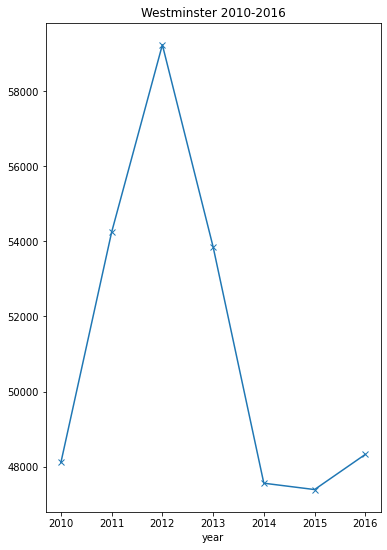

In [8]:
graph_wetminister.plot(marker='x',figsize=(6,9))
plt.title('Westminster 2010-2016')

# Bar Chart Borough westminster  


Text(0.5, 1.0, 'Westminster 2010-2016')

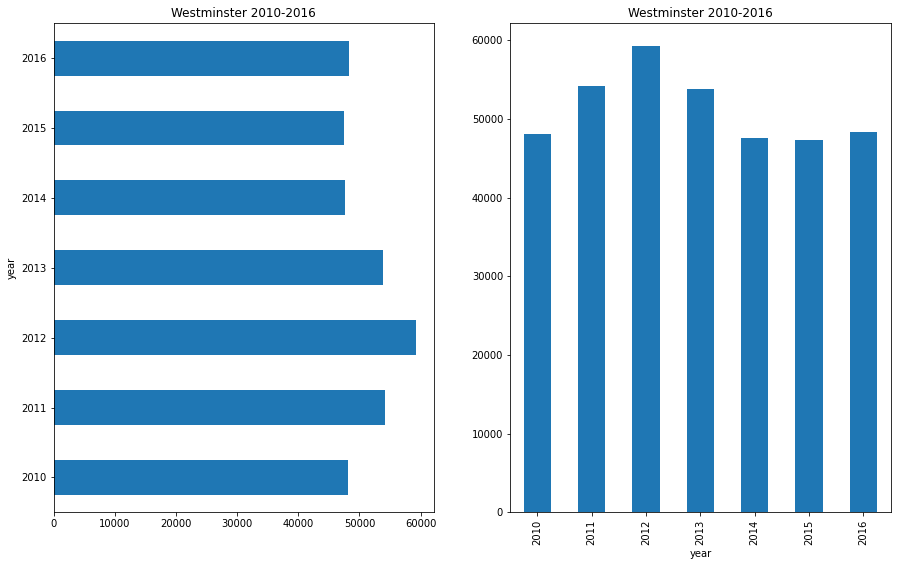

In [9]:
fig = plt.figure() 
# create figure 
ax0 = fig.add_subplot(1, 2, 1) 
# add subplot 1 (1 row, 2 columns, first plot) 
ax1 = fig.add_subplot(1, 2, 2) 


graph_wetminister.plot(kind='bar',figsize=(15,9), ax=ax1 )
ax1.set_title('Westminster 2010-2016')

graph_wetminister.plot(kind='barh',figsize=(15,9), ax=ax0 )
ax0.set_title('Westminster 2010-2016')


# Box Plot

Text(0.5, 1.0, 'Westminster 2010-2016')

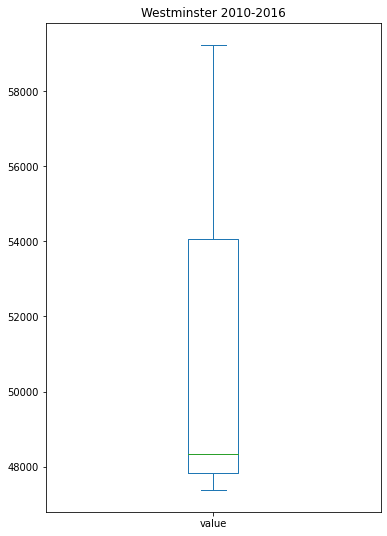

In [10]:
graph_wetminister.T.plot(kind='box',figsize=(6,9),vert=True)
plt.title('Westminster 2010-2016')

# Area plot

<AxesSubplot:xlabel='year'>

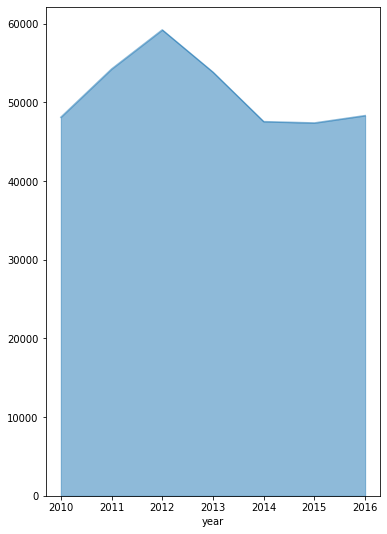

In [11]:
graph_wetminister.plot(kind='area',
                        stacked=False,
                        figsize=(6,9))

# Pie Chart

<AxesSubplot:ylabel='value'>

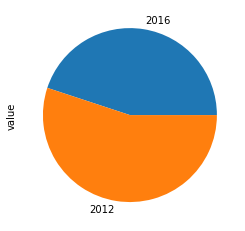

In [12]:
graph_wetminister[[2016,2012]].plot(kind='pie')

#perbandingan tingkat kriminalitas di borough westminister tahun 2012 dan 2016 
#persentase kejahahatan di westminister paling tinggi terjadi pada tahun 2012

## Histogram


<AxesSubplot:ylabel='Frequency'>

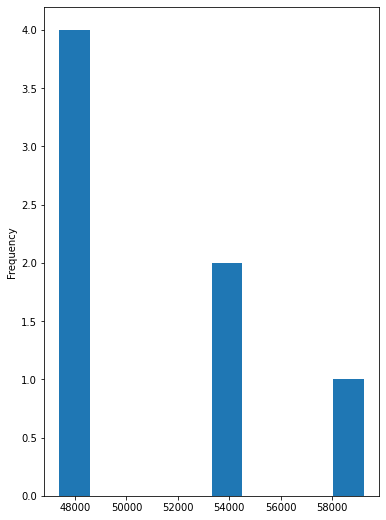

In [13]:
graph_wetminister.plot(kind='hist',figsize=(6,9))

In [14]:
count, bin_edges = np.histogram(graph_wetminister)
bin_edges = np.asanyarray(bin_edges, dtype=float)

print(bin_edges)

print(count)
print(bin_edges)

[47395.  48578.1 49761.2 50944.3 52127.4 53310.5 54493.6 55676.7 56859.8
 58042.9 59226. ]
[4 0 0 0 0 2 0 0 0 1]
[47395.  48578.1 49761.2 50944.3 52127.4 53310.5 54493.6 55676.7 56859.8
 58042.9 59226. ]


Text(0, 0.5, 'Frekuensi')

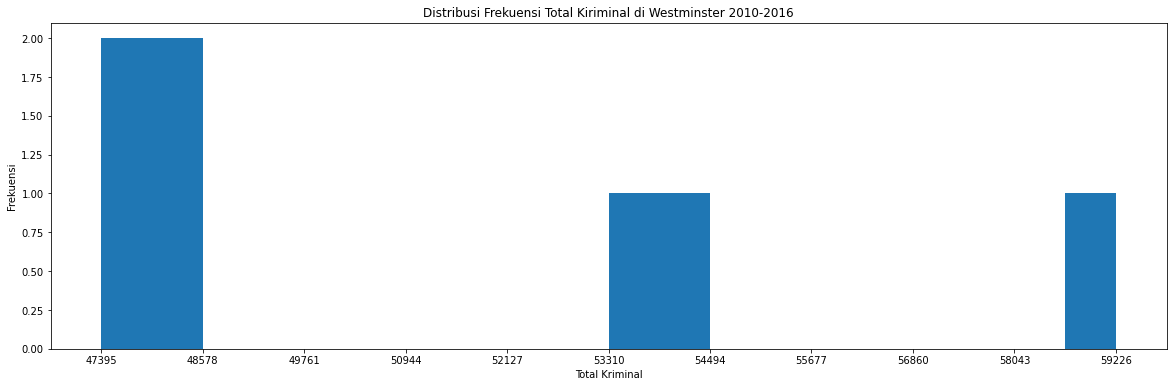

In [15]:
n=20
graph_wetminister.plot(kind="hist", 
             xticks = bin_edges, 
             figsize=(20,6),
             bins = n
             )

plt.title("Distribusi Frekuensi Total Kiriminal di Westminster 2010-2016")
plt.xlabel("Total Kriminal")
plt.ylabel("Frekuensi")
    

# Scatter Plots

In [16]:
df_westminster_2012 =df_westminster[df_westminster['year']==2012]
df_tot = pd.DataFrame(df_westminster_2012.groupby(['major_category'])['value'].sum())
df_tot.reset_index(inplace=True )
df_tot.columns = ['major_category','value']
df_tot.head()

,major_category,value
0,Burglary,4083
1,Criminal Damage,2254
2,Drugs,4654
3,Other Notifiable Offences,641
4,Robbery,2312


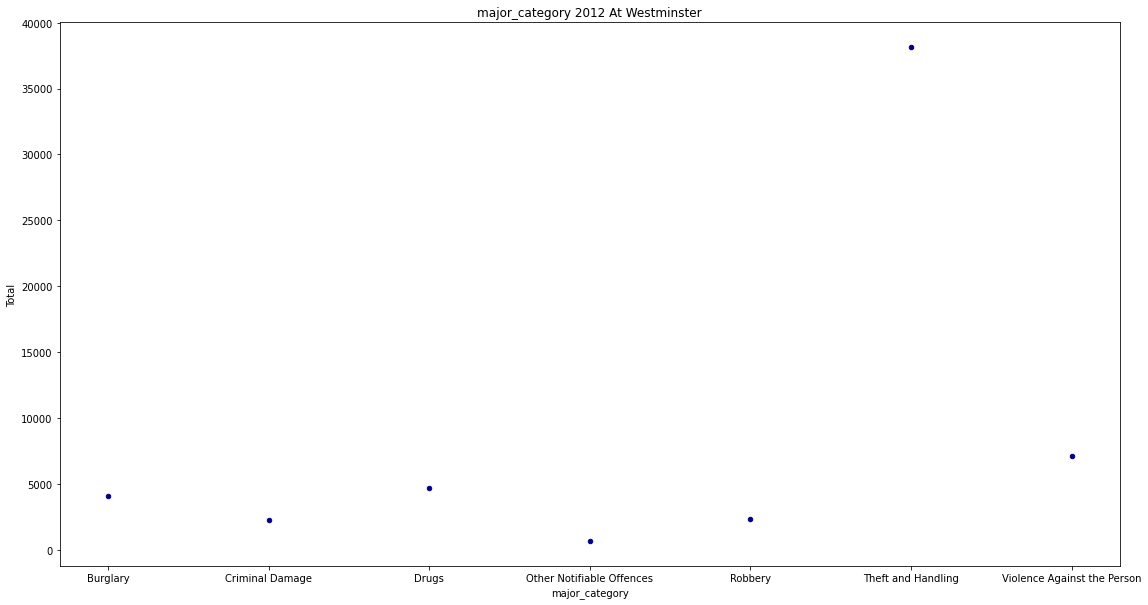

In [17]:
df_tot.plot(kind='scatter', x='major_category', y='value', figsize=(19, 10), color='darkblue') 
plt.title('major_category 2012 At Westminster')
plt.xlabel('major_category') 
plt.ylabel('Total') 
plt.show()

In [18]:
total_mc = pd.DataFrame(df_westminster_2012.groupby(['major_category'])['value'].sum())


crime_text = ""
max_words = 10000 # set maksimal jumlah kata yang ada di dalam canada_text
total_major_category =  df_westminster_2012['value'].sum()
print("max words:", max_words)
print("total mjr caetgory:", total_major_category)

# untuk setiap negara, kita hitung akan muncul berapa kali dengan rasio max_words yang sudah dipilih
for mc in df_westminster_2012.groupby(['major_category'])['value'].sum().index:
  
    major_cat = mc
    for s in " ,()-'":
        
        major_cat = "".join(major_cat.split(s))
    word_count = int(total_mc.loc[mc, "value"] / float(total_major_category) * max_words)
    crime_text = crime_text + ((major_cat + " ") * word_count)

# print(canada_text)
# text nya panjang
print("panjang text:", len(crime_text))


max words: 10000
total mjr caetgory: 59226
panjang text: 161895


(-0.5, 399.5, 199.5, -0.5)

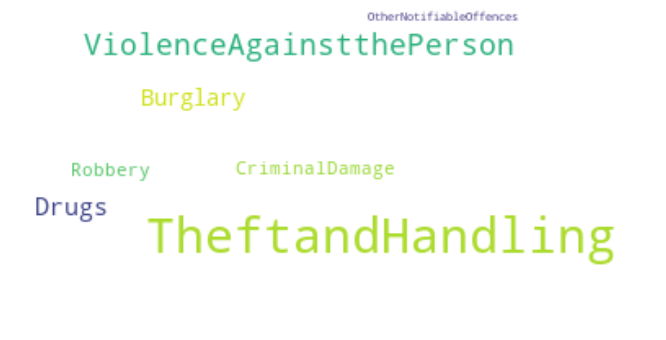

In [19]:
wc_can = WordCloud(background_color="white", max_words=max_words, collocations=False).generate(crime_text)

fig = plt.figure(figsize=(16,6))
plt.imshow(wc_can, interpolation="bilinear")
plt.axis("off")





## Westminster MAP

In [20]:
folium.Map(location=[51.4982654394761, -0.13559893238679213],
                    zoom_start=15)